# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + 'c695b8706d2f4a9452e480866f415a34' + "&q="
pp = pprint.PrettyPrinter(indent=4)

# functionality
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
#     Build query URL 
    query_url = generic_weather_url + city
#     Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod'] != 200:
        print(f'City not found. Skipping...')
    else: #include in our dataset
#         pp.pprint(weather_json)
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_Speed.append(weather_json['wind']['speed'])     

Beginning Data Retrieval
Processing Record 1 of Set 1 | peniche
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | bayji
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bonnyville
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | karamea
City not found. Skipping...
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | zunyi
Processing Record 21 of Set 1 | goundam
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | t

Processing Record 183 of Set 1 | hasaki
Processing Record 184 of Set 1 | vao
Processing Record 185 of Set 1 | cidreira
Processing Record 186 of Set 1 | saleaula
City not found. Skipping...
Processing Record 187 of Set 1 | lazaro cardenas
Processing Record 188 of Set 1 | champerico
Processing Record 189 of Set 1 | chumikan
Processing Record 190 of Set 1 | tura
Processing Record 191 of Set 1 | margate
Processing Record 192 of Set 1 | pocatello
Processing Record 193 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 194 of Set 1 | zaria
Processing Record 195 of Set 1 | airai
Processing Record 196 of Set 1 | touros
Processing Record 197 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 198 of Set 1 | katobu
Processing Record 199 of Set 1 | wanning
Processing Record 200 of Set 1 | kyzyl-suu
Processing Record 201 of Set 1 | hofn
Processing Record 202 of Set 1 | naze
Processing Record 203 of Set 1 | zhuhai
Processing Record 204 of Set 1 | meulaboh
Processing Record

Processing Record 368 of Set 1 | ilebo
Processing Record 369 of Set 1 | kiunga
Processing Record 370 of Set 1 | baturaden
Processing Record 371 of Set 1 | ocosingo
Processing Record 372 of Set 1 | faya
Processing Record 373 of Set 1 | rundu
Processing Record 374 of Set 1 | rawson
Processing Record 375 of Set 1 | kagadi
Processing Record 376 of Set 1 | sola
Processing Record 377 of Set 1 | rungata
City not found. Skipping...
Processing Record 378 of Set 1 | dalnerechensk
Processing Record 379 of Set 1 | lakatoro
Processing Record 380 of Set 1 | zhanaozen
Processing Record 381 of Set 1 | qaqortoq
Processing Record 382 of Set 1 | voh
Processing Record 383 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 384 of Set 1 | rahon
Processing Record 385 of Set 1 | princeton
Processing Record 386 of Set 1 | manggar
Processing Record 387 of Set 1 | san matias
Processing Record 388 of Set 1 | vila
Processing Record 389 of Set 1 | bambous virieux
Processing Record 390 of Set 1 | bat

Processing Record 548 of Set 1 | jahrom
City not found. Skipping...
Processing Record 549 of Set 1 | qeshm
Processing Record 550 of Set 1 | sao felix do xingu
Processing Record 551 of Set 1 | kenai
Processing Record 552 of Set 1 | bima
Processing Record 553 of Set 1 | bamiantong
Processing Record 554 of Set 1 | kokopo
Processing Record 555 of Set 1 | odienne
Processing Record 556 of Set 1 | latung
Processing Record 557 of Set 1 | kulu
Processing Record 558 of Set 1 | trairi
Processing Record 559 of Set 1 | presidente medici
Processing Record 560 of Set 1 | nanortalik
Processing Record 561 of Set 1 | sicamous
Processing Record 562 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 563 of Set 1 | tyubuk
Processing Record 564 of Set 1 | moron
Processing Record 565 of Set 1 | yulara
Processing Record 566 of Set 1 | cabra
Processing Record 567 of Set 1 | atambua
Processing Record 568 of Set 1 | arlit
Processing Record 569 of Set 1 | berezovka
Processing Record 570 of Set 1 | c

In [60]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
City          562 non-null object
Cloudiness    562 non-null int64
Country       562 non-null object
Date          562 non-null int64
Humidity      562 non-null int64
Lat           562 non-null float64
Lng           562 non-null float64
Max Temp      562 non-null float64
Wind Speed    562 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.6+ KB


In [62]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Peniche,20,PT,1552509339,66,39.36,-9.38,284.260,6.70
1,Chuy,80,UY,1552509351,86,-33.69,-53.46,294.074,11.43
2,Bredasdorp,92,ZA,1552509045,88,-34.53,20.04,292.040,1.50
3,Bayji,92,IQ,1552509578,35,34.93,43.49,292.424,8.58
4,Rikitea,92,PF,1552509578,100,-23.12,-134.97,297.249,8.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [97]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Cloudiness'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    

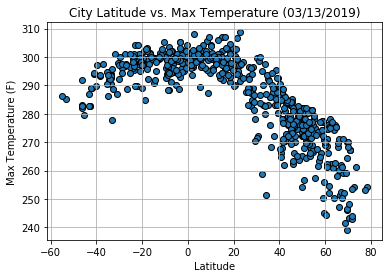

In [98]:
generic_plot('Lat','Max Temp')

#### Latitude vs. Humidity Plot

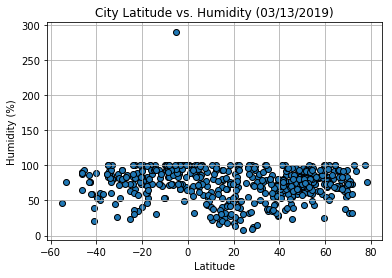

In [99]:
generic_plot('Lat','Humidity')

#### Latitude vs. Cloudiness Plot

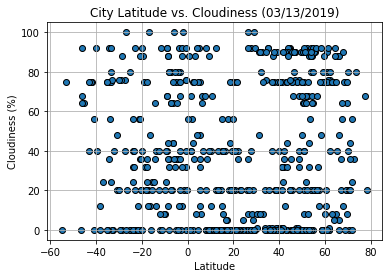

In [100]:
generic_plot('Lat','Cloudiness')

#### Latitude vs. Wind Speed Plot

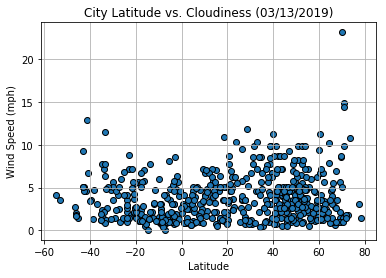

In [101]:
generic_plot('Lat','Wind Speed')